In [1]:
print("Test")

Test


## Wind Factor Data EDA

ref. https://www.kaggle.com/code/lucamassaron/eda-target-analysis

In [5]:
import copy
import pandas as pd
import numpy as np
import sklearn
import pickle
import datetime
import datatable as dtb
from datetime import datetime
import matplotlib.pyplot as plt

from wind_get_data import get_wind_data, get_toy_data
from quant_finance_research.utils import load_pickle, save_pickle
from quant_finance_research.utils import get_example_df
from quant_finance_research.eda.eda_feat import *
from quant_finance_research.fe.fe_val import panel_time_sumone_normalize_preprocess

print("Finish Basic Import.")

Finish Basic Import.


In [6]:
out_sample_start = datetime.strptime('2018-12-31 23:00:00', '%Y-%m-%d %H:%M:%S')
# insample, outsample, df_column, dy_col = get_toy_data(out_sample_start=out_sample_start)
insample, outsample, df_column, dy_col = get_wind_data(out_sample_start=out_sample_start)

In [7]:
insample.head(5)

,time_id,investment_id,weight,next_1d,next_10d,DailyValuationFactor_S_DFA_LNMV,DailyValuationFactor_S_DFA_LNTOTASSETS,DailyValuationFactor_S_DFA_FLOATMV,DailyValuationFactor_S_DFA_LNFLOATMV,DailyValuationFactor_S_DFA_OPPS,...,TurnoverTechnicalFactor_S_TECH_MKTFACIIND,TurnoverTechnicalFactor_s_tech_CYF,TurnoverTechnicalFactor_s_tech_volumevolatility,TurnoverTechnicalFactor_s_tech_volume1M60,TurnoverTechnicalFactor_s_tech_volumn1M,TurnoverTechnicalFactor_s_tech_turn5Dturn120,TurnoverTechnicalFactor_s_tech_turn10Dturn120,TurnoverTechnicalFactor_s_tech_turn20Dturn120,TurnoverTechnicalFactor_s_tech_amount1m60,TurnoverTechnicalFactor_S_TECH_CRY
0,2009-03-02 15:00:00,1000001,0.004507,-0.030603,0.034676,1.815517,2.270981,2.222722,2.246198,1.740392,...,1.767405,-0.756960,0.667223,-1.165474,0.582566,0.488776,0.174960,-0.875737,-0.967422,-1.503477
1,2009-03-02 15:00:00,1000002,0.007256,0.006026,0.011865,2.006968,2.036834,2.549025,2.460124,0.967422,...,2.664249,-0.949055,-0.054182,0.495326,0.910319,-0.486598,-0.664809,-0.562062,0.069685,0.495326
2,2009-03-02 15:00:00,1000004,0.000607,-0.025884,-0.004413,0.077442,-0.384487,0.655190,0.349316,-0.749255,...,0.521739,-0.094915,-0.135805,0.353431,0.490957,-0.220326,0.353431,0.449907,0.361678,0.614961
3,2009-03-02 15:00:00,1000005,0.000887,0.026228,0.030034,0.334961,0.782975,0.809531,0.785605,1.041078,...,1.992682,0.347261,0.085205,0.482248,1.786156,1.271070,0.643250,0.629043,0.386571,0.145572
4,2009-03-02 15:00:00,1000008,0.001656,-0.011144,-0.082611,1.008381,0.780349,1.311127,1.208508,0.168090,...,2.325191,1.008381,-1.027867,-0.475741,1.546791,0.612626,0.085205,-0.898672,0.208451,-1.451628


In [8]:
from quant_finance_research.plot.plot_utils import plot_seq_setting
import seaborn as sns

## Basic EDA

In [72]:
def eda_basic_sketch(df, df_column, time_col='time_id', inv_col='investment_id', target_col=None):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    print(df.columns)
    obs = insample.shape[0]
    print(f"number of observations: {obs}")
    time_steps, assets = insample[time_col].nunique(), insample[inv_col].nunique()
    print(f"number of assets: {assets} \t time steps: {time_steps}")
    print(f"number of assets: {assets} (range from {insample[inv_col].min()} to {insample[inv_col].max()})")
    print(f"number of time steps: {time_steps} (range from {insample[time_col].min()} to {insample[time_col].max()})")
    
    r = np.corrcoef(df.groupby(time_col)[inv_col].nunique(), df.groupby(time_col)[target_col].mean())[0][1]
    print(f"Correlation of [Number of Assets] by [Target Mean]: {r:0.5f}")
    
    r = np.corrcoef(df.groupby(time_col)[inv_col].nunique(), df.groupby(time_col)[target_col].std())[0][1]
    print(f"Correlation of [Number of Assets] by [Target Std]: {r:0.5f}")
    
eda_basic_sketch(insample, df_column)

Index(['time_id', 'investment_id', 'weight', 'next_1d', 'next_10d',
       'DailyValuationFactor_S_DFA_LNMV',
       'DailyValuationFactor_S_DFA_LNTOTASSETS',
       'DailyValuationFactor_S_DFA_FLOATMV',
       'DailyValuationFactor_S_DFA_LNFLOATMV',
       'DailyValuationFactor_S_DFA_OPPS',
       ...
       'TurnoverTechnicalFactor_S_TECH_MKTFACIIND',
       'TurnoverTechnicalFactor_s_tech_CYF',
       'TurnoverTechnicalFactor_s_tech_volumevolatility',
       'TurnoverTechnicalFactor_s_tech_volume1M60',
       'TurnoverTechnicalFactor_s_tech_volumn1M',
       'TurnoverTechnicalFactor_s_tech_turn5Dturn120',
       'TurnoverTechnicalFactor_s_tech_turn10Dturn120',
       'TurnoverTechnicalFactor_s_tech_turn20Dturn120',
       'TurnoverTechnicalFactor_s_tech_amount1m60',
       'TurnoverTechnicalFactor_S_TECH_CRY'],
      dtype='object', length=149)
number of observations: 5069407
number of assets: 3600 	 time steps: 2390
number of assets: 3600 (range from 1000001 to 1003637)
number of t

The correlation of assets number and target is negative, in fact. I wonder if we are modelling the asset allocation strategies alongside the markets.

## Asset-Target EDA

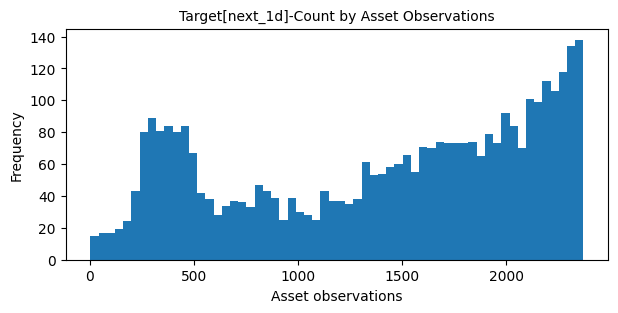

In [31]:
def eda_target_asset_count_hist(df, df_column, inv_col='investment_id', bins=60, target_col=None, fig_size=(7, 3),
                                save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    obs_by_asset = df.groupby(inv_col)[target_col].count()
    plot_seq_setting(figsize=fig_size, xlabel='Asset observations',
                     title=f"Target[{target_col}]-Count by Asset Observations")
    obs_by_asset.plot.hist(bins=bins)
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_asset_count_hist(insample, df_column)

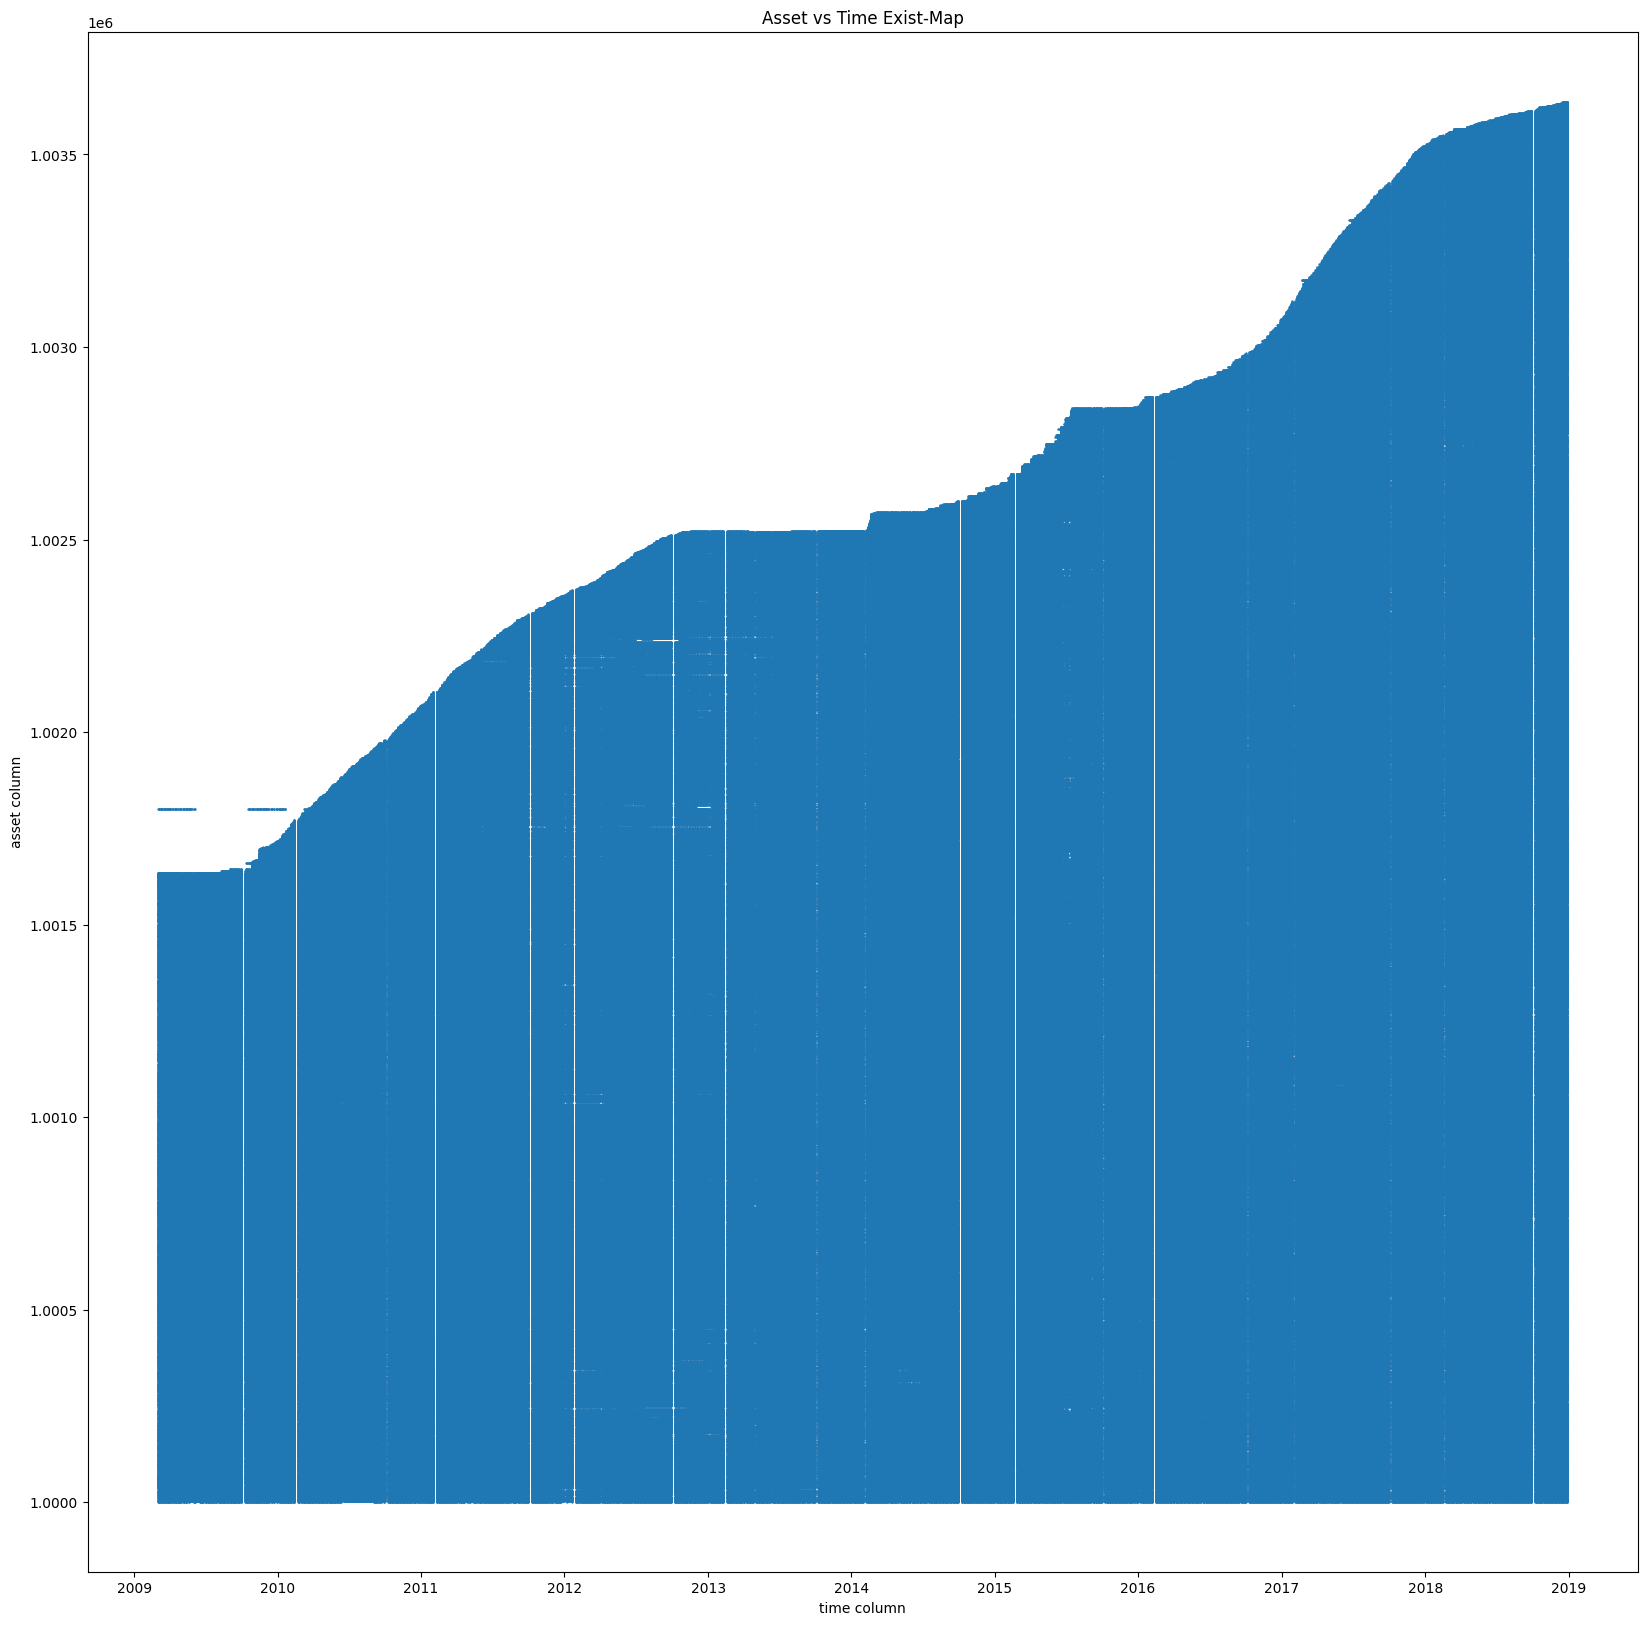

In [11]:
def eda_time_asset_exist_scatter(df, df_column, inv_col='investment_id', time_col='time_id', fig_size=(20, 20),
                                 s=0.5, save_filename=None, save_dpi=150):
    df[[inv_col, time_col]].plot.scatter(time_col, inv_col, figsize=fig_size, s=s)
    plt.title("Asset vs Time Exist-Map")
    plt.xlabel("time column")
    plt.ylabel("asset column")
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_time_asset_exist_scatter(insample, df_column)

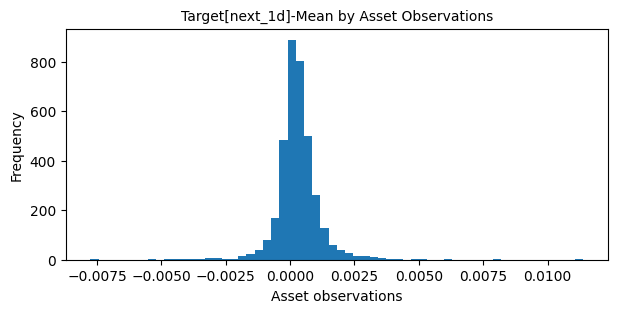

In [35]:
def eda_target_asset_mean_hist(df, df_column, inv_col='investment_id', bins=60, target_col=None, fig_size=(7, 3),
                               save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    obs_by_asset = df.groupby(inv_col)[target_col].mean()
    plot_seq_setting(figsize=fig_size, xlabel='Asset observations',
                     title=f"Target[{target_col}]-Mean by Asset Observations")
    obs_by_asset.plot.hist(bins=bins)
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_asset_mean_hist(insample, df_column)

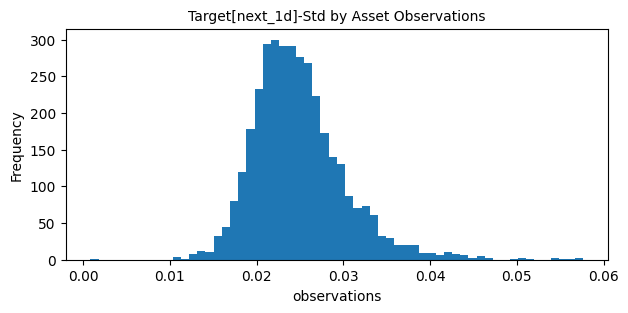

In [28]:
def eda_target_asset_std_hist(df, df_column, inv_col='investment_id', bins=60, target_col=None, fig_size=(7, 3),
                              save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    obs_by_asset = df.groupby(inv_col)[target_col].std()
    plot_seq_setting(figsize=fig_size, xlabel='observations',
                     title=f"Target[{target_col}]-Std by Asset Observations")
    obs_by_asset.plot.hist(bins=bins)
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_asset_std_hist(insample, df_column)

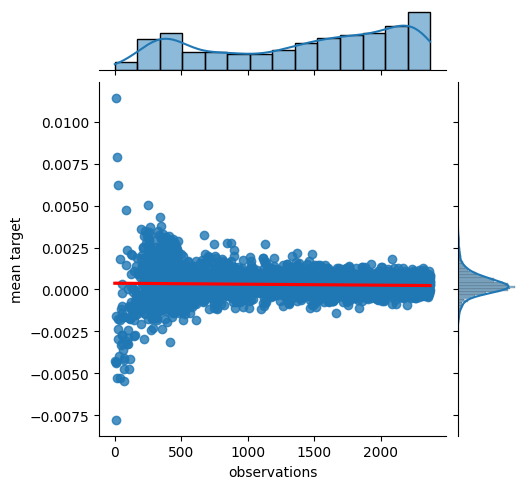

In [42]:
def eda_target_asset_count_mean_join(df, df_column, inv_col='investment_id', target_col=None, height=5,
                                     save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    obs_by_asset = df.groupby(inv_col)[target_col].count()
    mean_target = df.groupby([inv_col])[target_col].mean()
    ax = sns.jointplot(x=obs_by_asset, y=mean_target, kind="reg",
                       height=height, joint_kws={'line_kws':{'color':'red'}})
    ax.ax_joint.set_xlabel('observations')
    ax.ax_joint.set_ylabel('mean target')
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_asset_count_mean_join(insample, df_column)

By jointly plotting the distribution of observartions by asset and the mean target value by asset, we may notice that the target value slightly reduces proportionally to the number of observation. The dispersion of values tends to grow with less observations, hence we need to re-plot the scatterplot this time using the standard deviation.

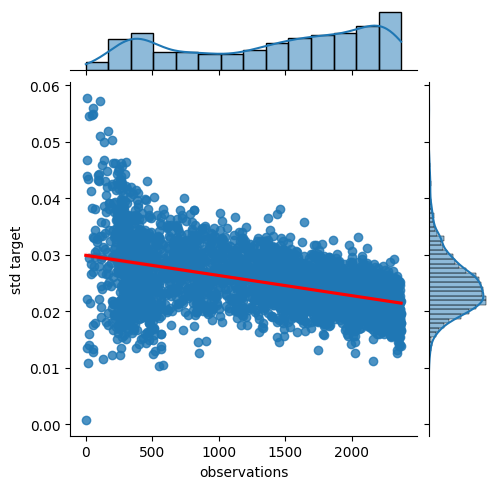

In [43]:
def eda_target_asset_count_std_join(df, df_column, inv_col='investment_id', target_col=None, height=5,
                                    save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    obs_by_asset = df.groupby(inv_col)[target_col].count()
    mean_target = df.groupby([inv_col])[target_col].std()
    ax = sns.jointplot(x=obs_by_asset, y=mean_target, kind="reg",
                       height=height, joint_kws={'line_kws':{'color':'red'}})
    ax.ax_joint.set_xlabel('observations')
    ax.ax_joint.set_ylabel('std target')
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_asset_count_std_join(insample, df_column)

The new scatterplot reveals that the less the observations, imply a much more uncertainty in the mean target. Since the mechanism o

**Strategy**: in training you need to control this effect by expliciting the number of observations because this is predictive of the uncertainty of the predictions. In the test phase, instead, when you are working with an asset that you don't know about, you need to impute an average number of observations, thus expecting an average dispersion of predictions for that asset.

## Time Series EDA

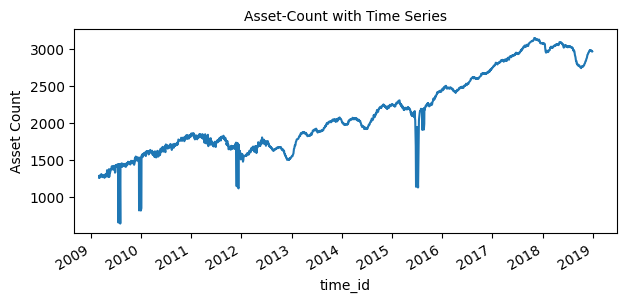

In [39]:
def eda_asset_time_count_plot(df, df_column, inv_col='investment_id', time_col='time_id', fig_size=(7, 3),
                              save_filename=None, save_dpi=150):
    plot_seq_setting(figsize=fig_size, xlabel='Time Series', ylabel='Asset Count', title=f"Asset-Count with Time Series")
    df.groupby(time_col)[inv_col].nunique().plot()
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_asset_time_count_plot(insample, df_column)

As we have reasoned how the investments with less observations seem more risky, we notice how the number of the assets present at each time step is quite different and also highly oscillating. By the end of the avaliable time, the number of assets has grown by one third.

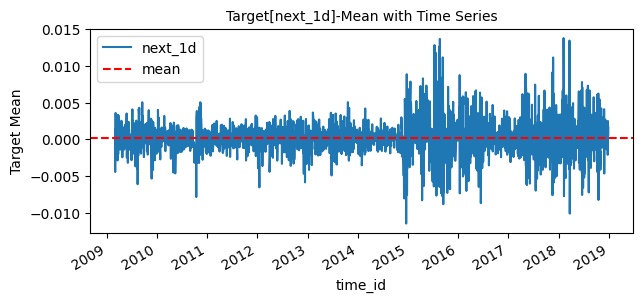

In [48]:
def eda_target_time_mean_plot(df, df_column, time_col='time_id', target_col=None, fig_size=(7, 3),
                              save_filename=None, save_dpi=150):
    
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    plot_seq_setting(figsize=fig_size, xlabel='Time Series', ylabel='Target Mean', 
                     title=f"Target[{target_col}]-Mean with Time Series")
    mean_target = df.groupby([time_col])[target_col].mean()
    mean_target.plot()
    plt.axhline(y=np.mean(mean_target), color='r', linestyle='--', label="mean")
    plt.legend()
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_time_mean_plot(insample, df_column)

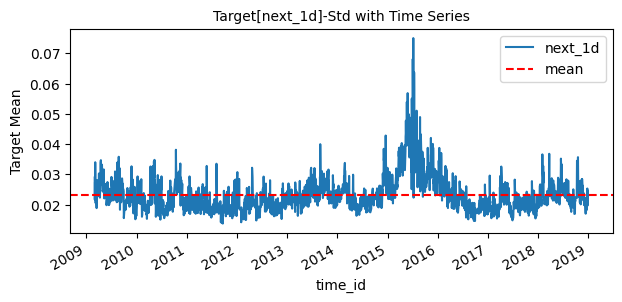

In [50]:
def eda_target_time_std_plot(df, df_column, time_col='time_id', target_col=None, fig_size=(7, 3),
                             save_filename=None, save_dpi=150):
    
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    plot_seq_setting(figsize=fig_size, xlabel='Time Series', ylabel='Target Mean', 
                     title=f"Target[{target_col}]-Std with Time Series")
    std_target = df.groupby([time_col])[target_col].std()
    std_target.plot()
    plt.axhline(y=np.mean(std_target), color='r', linestyle='--', label="mean")
    plt.legend()
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_time_std_plot(insample, df_column)

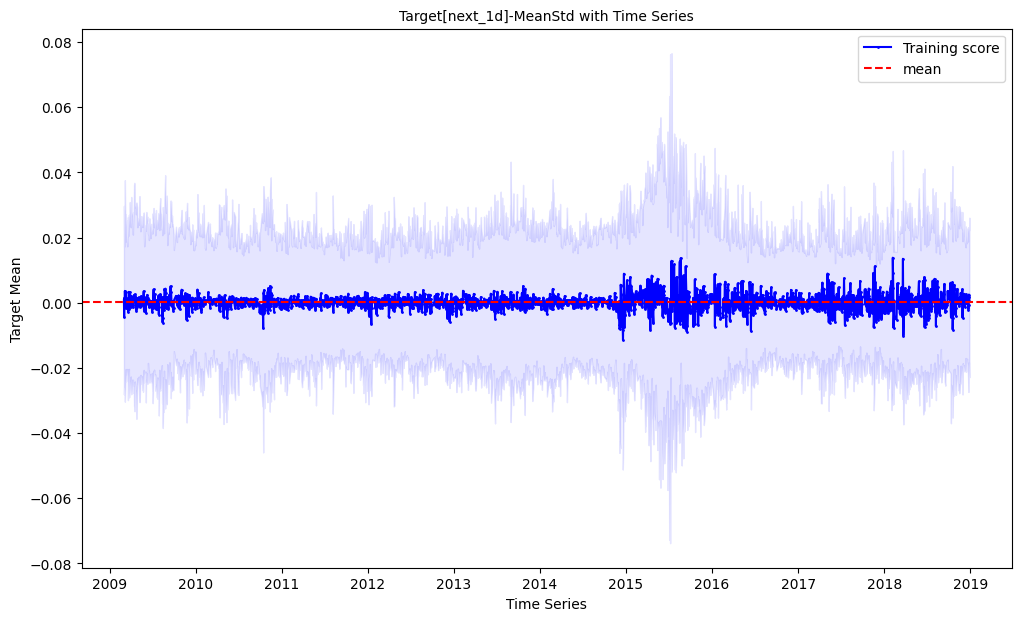

In [59]:
def eda_target_time_mean_std_plot(df, df_column, time_col='time_id', target_col=None, fig_size=(12, 7), s=1.0,
                                  save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    time2target_mean = df.groupby([time_col])[target_col].mean()
    time2target_std = df.groupby([time_col])[target_col].std()
    plot_seq_setting(figsize=fig_size, xlabel='Time Series', ylabel='Target Mean', 
                     title=f"Target[{target_col}]-MeanStd with Time Series")

    plt.fill_between(
            time2target_mean.index,
            time2target_mean - time2target_std,
            time2target_mean + time2target_std,
            alpha=0.1,
            color="b",
        )
    plt.plot(time2target_mean.index, time2target_mean, "o-", color="b", markersize=s, label="Training score")
    plt.axhline(y=np.mean(time2target_mean), color='r', linestyle='--', label="mean")
    plt.legend()
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)

eda_target_time_mean_std_plot(insample, df_column)

Clearly the target is forced to mean zero, with none-unit standard deviation, though at times when the number of assets is reduced the average changes and consequently shifts also the confidence interval. Being able to figure out such times of mean shift in the test set could be quite advantageous.

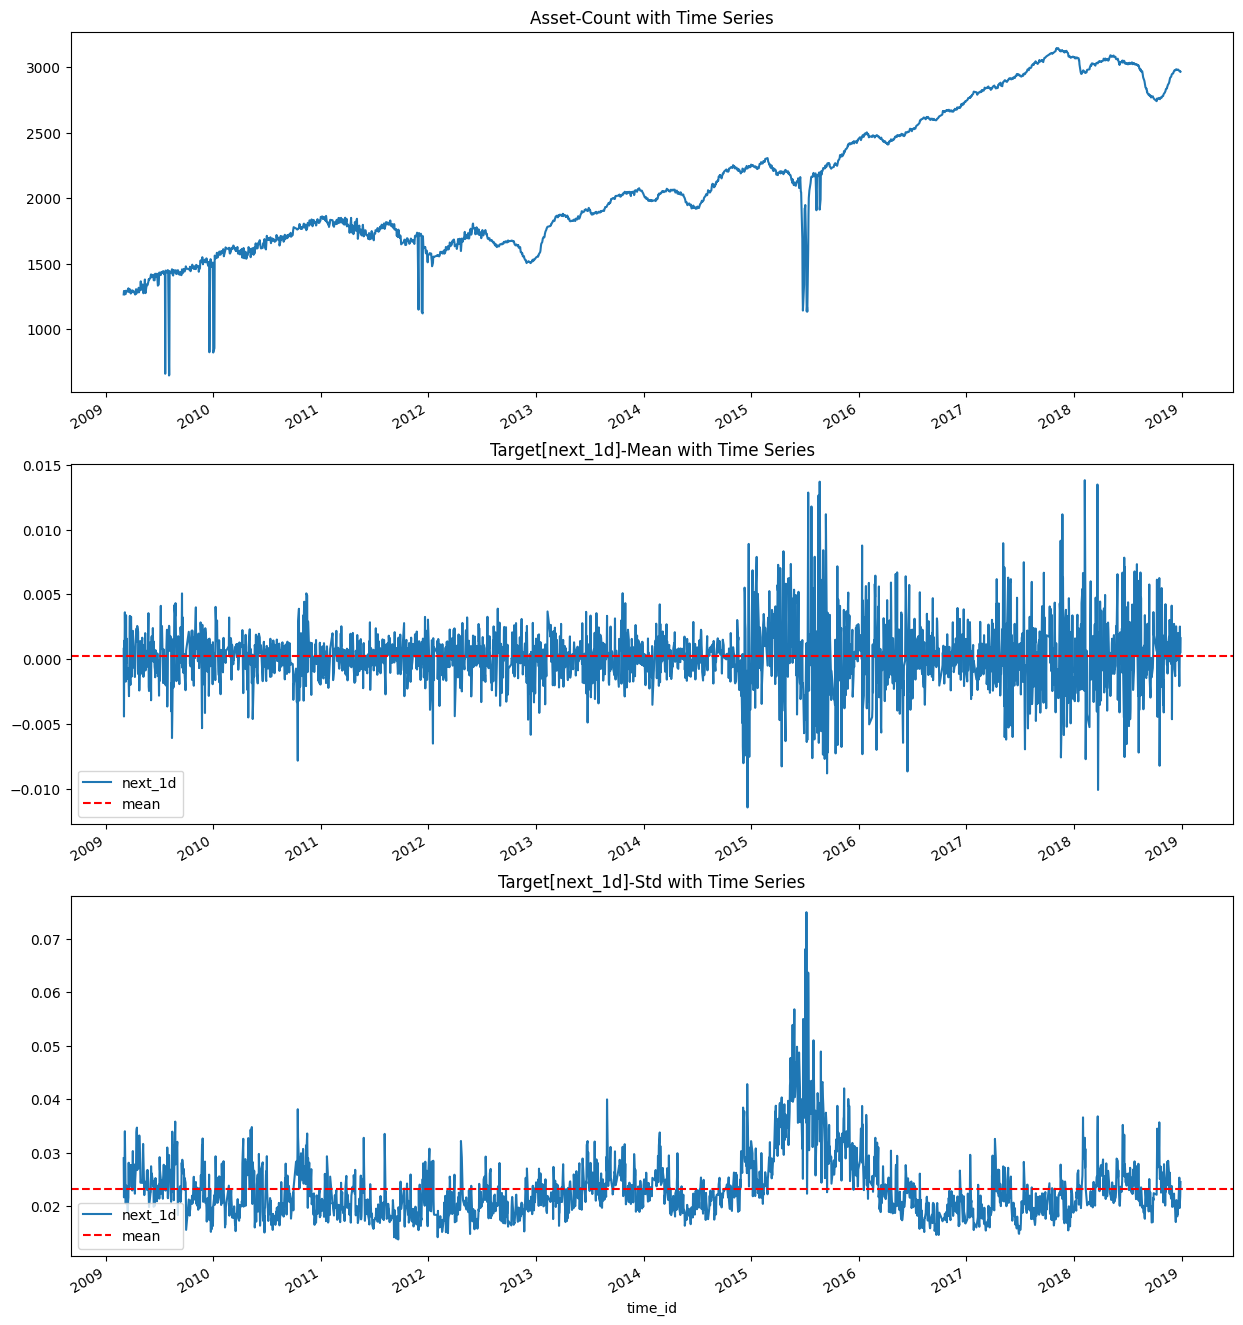

In [73]:
def eda_time_basic_summary_plot(df, df_column, time_col='time_id', inv_col='investment_id', target_col=None, 
                                fig_size=(15, 18), save_filename=None, save_dpi=150):
    target_col = target_col if target_col is not None else df.columns[df_column['y'][0]]
    plt.figure(figsize=fig_size)

    plt.subplot(3, 1, 1)
    df.groupby(time_col)[inv_col].nunique().plot()
    plt.title(f"Asset-Count with Time Series")
    plt.xlabel(None)

    plt.subplot(3, 1, 2)
    mean_target = df.groupby(time_col)[target_col].mean()
    mean_target.plot()
    plt.title(f"Target[{target_col}]-Mean with Time Series")
    plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean")
    plt.legend(loc='lower left')
    plt.xlabel(None)

    plt.subplot(3, 1, 3)
    std_target = df.groupby(time_col)[target_col].std()
    std_target.plot()
    plt.title(f"Target[{target_col}]-Std with Time Series")
    plt.axhline(y=std_target.mean(), color='r', linestyle='--', label="mean")
    plt.legend(loc='lower left')

    plt.show()
    
    if save_filename:
        plt.savefig(save_filename, dpi=save_dpi)
        
eda_time_basic_summary_plot(insample, df_column)

Basically, this chart is the key. The task of the competition is to find out the position of an asset in a day. Is the asset near the average or how much is far away from it (you are predicting volatility, basically). In fact the evaluation is based on the mean of the Pearson correlation coefficient for each time ID.

(Not Do):
In the following chart we are overimposing the target for asset 70 with the market average and the unit standard deviation band. Clearly the position of asset 70 depends on its performance but also on the way the mean and standard deviation for that period_id is calculated (are we analyzing the volatility inside a basket of investment, maybe?).

Strategy: now your cv strategy should be clear, you have to do groupkfold on the time_id, keeping all the assets realtive to a time_id or in train or in validation.

## FE

#### Hypothesis: we can get a proxy of the count of obs by asset based on the features?

In [77]:
target_col = insample.columns[dy_col[0]]
inv_col = 'investment_id'
obs_by_asset = insample.groupby([inv_col])[target_col].count().to_dict()
target = insample.investment_id.copy().replace(obs_by_asset).astype(np.int16)
# 

In [83]:
del(obs_by_asset)
features = insample.columns[df_column['x']]

In [80]:
target

0          2248
1          2194
2          1800
3          2211
4          2197
           ... 
5069402      12
5069403      12
5069404      11
5069405       8
5069406       2
Name: investment_id, Length: 5069407, dtype: int16

In [86]:
corrs = list()
for col in features:
    corr = np.corrcoef(target, insample[col])[0][1]
    corrs.append(corr)
    
# del(target)

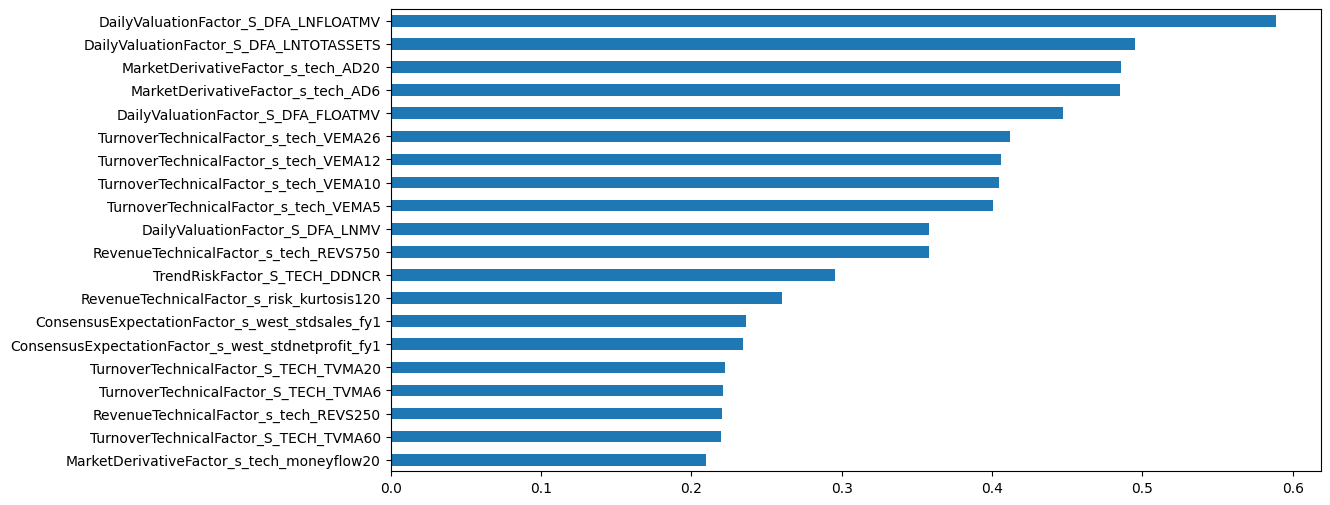

In [89]:
feat_importances = pd.Series(corrs, index=features)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12, 6)).invert_yaxis()
plt.show()

Actually based on a few features, the fact that an asset has less or more observations should be quite predictable based on features with high correlation.